In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# --- 1. Menghubungkan Google Drive ---
# Kode ini akan meminta otorisasi untuk mengakses Google Drive Anda.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# --- 1. Memuat dan Mempersiapkan Data ---
# Muat dataset Iris
file_path = '/content/drive/MyDrive/Colab Notebooks/PMM-TemplateSLP_1.xlsx'

# Baca file excel menjadi sebuah pandas DataFrame
try:
    iris_df = pd.read_excel(file_path)
    print("File Excel berhasil dibaca. Berikut 5 baris pertama data:")
    print(iris_df.head())
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di path '{file_path}'")
    print("Pastikan path file sudah benar dan file tersebut ada.")
    # Hentikan eksekusi jika file tidak ditemukan
    exit()


File Excel berhasil dibaca. Berikut 5 baris pertama data:
    X0   X1   X2   X3           X4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [26]:
# Pisahkan fitur (X) dan target (y) dari DataFrame
# Kita tetap menggunakan kolom 'petal_length' dan 'petal_width' sebagai fitur
X_df = iris_df[['X0','X1','X2', 'X3']]

# Kita akan membuat target menjadi biner:
# Kelas 0 (Setosa) vs Kelas 1 (Versicolor)
# (iris.target == 0) akan menghasilkan True untuk Setosa dan False untuk lainnya.
# .astype(int) mengubah True/False menjadi 1/0.
y_series = (iris_df['X4'] == 'Iris-versicolor').astype(int)

# Konversi dari format pandas (DataFrame/Series) ke format scikit-learn (NumPy array)
x = X_df.values
y = y_series.values

In [27]:
'''
#mengambil data untuk disimpan dalam CSV
data_simpan = X_df.copy()
data_simpan['Target'] = y_series

nama_file = 'data_iris_training.csv'
data_simpan.to_csv(nama_file, index=False)

print(f"✅ Data berhasil disimpan ke file '{nama_file}'")
print("\n5 baris pertama dari data yang disimpan:")
print(data_simpan.head())

'''

'\n#mengambil data untuk disimpan dalam CSV\ndata_simpan = X_df.copy()\ndata_simpan[\'Target\'] = y_series\n\nnama_file = \'data_iris_training.csv\'\ndata_simpan.to_csv(nama_file, index=False)\n\nprint(f"✅ Data berhasil disimpan ke file \'{nama_file}\'")\nprint("\n5 baris pertama dari data yang disimpan:")\nprint(data_simpan.head())\n\n'

In [28]:
# --- 2. Membagi Data Menjadi Data Latih dan Data Uji ---

# Bagi data dengan perbandingan 80% latih dan 20% uji
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Penskalaan Fitur
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train
X_test_scaled = X_test

In [29]:
'''
#mengambil data untuk disimpan dalam CSV
X_train_save = pd.DataFrame(X_train, columns=['X0','X1','X2', 'X3'])
y_train_save = pd.DataFrame(y_train, columns=['Target'])
data_simpan = pd.concat([X_train_save, y_train_save], axis=1)

nama_file = 'data_iris_training.csv'
data_simpan.to_csv(nama_file, index=False)

print(data_simpan.head())
print('-'*50)
print(X_train, y_train)
'''

"\n#mengambil data untuk disimpan dalam CSV\nX_train_save = pd.DataFrame(X_train, columns=['X0','X1','X2', 'X3'])\ny_train_save = pd.DataFrame(y_train, columns=['Target'])\ndata_simpan = pd.concat([X_train_save, y_train_save], axis=1)\n\nnama_file = 'data_iris_training.csv'\ndata_simpan.to_csv(nama_file, index=False)\n\nprint(data_simpan.head())\nprint('-'*50)  \nprint(X_train, y_train)\n"

In [30]:
# 3. Definisikan Fungsi Aktivasi Sigmoid
def sigmoid(z):
    """Fungsi untuk menghitung aktivasi sigmoid"""
    return 1.0 / (1.0 + np.exp(-z))

# 4. Inisialisasi Parameter
learning_rate = 0.1
n_epochs = 5 # Epoch Jumlahnya = 5 kali
n_features = X_train_scaled.shape[1]

# History untuk data training
current_sse_history = []
current_accuracy_history = []

#train_sse_history = []
#train_accuracy_history = []

# History untuk data validasi
val_sse_history = []
val_accuracy_history = []

# 5. Inisialisasi bobot (weights) dan bias = 0.5
# Menggunakan random_state untuk hasil yang konsisten

weights = np.full(shape=n_features, fill_value=0.5)
bias = 0.5

print(f"Inisialisasi Bobot Awal: {weights}")
print(f"Inisialisasi Bias Awal: {bias}\n")
print("="*80)
print("MEMULAI PROSES PELATIHAN MODEL SLP")
print("="*80)

# 5. Proses Pelatihan (Training Loop)
for epoch in range(n_epochs):
    print(f"\n---------- EPOCH {epoch + 1} ----------")

    # Inisialisasi metrik kumulatif di awal setiap epoch
    cumulative_sse = 0.0
    cumulative_correct_predictions = 0

    # Loop untuk setiap sampel data dalam data latih
    # --- Training pada data latih ---
    for i, x_i in enumerate(X_train_scaled):


        # Langkah 1: Hitung Net Input (dot product z)
        # z = (w1*x1 + w2*x2 + ...) + b
        z = np.dot(x_i, weights) + bias

        # Langkah 2: Hitung Output Aktivasi (Sigmoid)
        activation = sigmoid(z)

        # Langkah 3: Buat Prediksi
        # Jika output sigmoid > 0.5, prediksi kelas 1, selain itu kelas 0
        prediction = 1 if activation >= 0.5 else 0

        # Langkah 4: Hitung Error
        # Error = Label Asli - Prediksi
        error = y_train[i] - prediction

        # Langkah 5: Update Bobot dan Bias
        # w_new = w_old - (learning_rate * (2*(sigmoid-target)*(1-sigmoid)*sigmoid) * x_i
        # b_new = b_old - (learning_rate * (2*(sigmoid-target)*(1-sigmoid)*sigmoid)
        weights -= learning_rate * (2*(sigmoid(z)-y_train[i])*(1-sigmoid(z))*sigmoid(z)) * x_i
        bias -= learning_rate * (2*(sigmoid(z)-y_train[i])*(1-sigmoid(z))*sigmoid(z))

        # Langkah 6 : Hitung Sum Square Error
        cumulative_sse += error**2

        # Langkah 7 : Hitung Akurasi
        if prediction == y_train[i]:
            cumulative_correct_predictions += 1

        # Hitung akurasi berjalan (running accuracy)
        current_accuracy = cumulative_correct_predictions / (i + 1)

        # Tampilkan semua detail proses untuk sampel ini

        '''
        print(f"  Sampel -{i+1}:")
        print(f"    - Bobot       : {weights}")
        print(f"    - Bias        : {bias:.4f}")
        print(f"    - Dot (z)     : {z:.4f}")
        print(f"    - Sigmoid     : {activation:.4f}")
        print(f"    - Prediksi    : {prediction} (Label Asli: {y_train[i]})")
        print(f"    - Error       : {error}")
        print(f"    - Sum Square Error : {cumulative_sse}")
        print(f"    - Akurasi     : {current_accuracy:.2%}")
        print("-" * 40)
        '''

    current_sse_history.append(cumulative_sse)
    current_accuracy_history.append(current_accuracy)
    print(f"Epoch {epoch+1:02d} | Train Acc: {current_accuracy:.2%} | Train SSE: {cumulative_sse:.2f} |")

    # --- Blok Evaluasi pada Data Validasi ---
    val_epoch_sse = 0.0
    val_correct_predictions = 0
    for i, x_i in enumerate(X_test_scaled): # Gunakan data validasi
        z_val = np.dot(x_i, weights) + bias
        prediction_val = 1 if sigmoid(z_val) >= 0.5 else 0
        error_val = y_test[i] - prediction_val # Gunakan label validasi
        val_epoch_sse += error_val**2
        if prediction_val == y_test[i]:
            val_correct_predictions += 1
        val_epoch_accuracy1 = val_correct_predictions / len(y_test)

        '''
        print(f"  Validasi Sampel -{i+1}:")
        print(f"    - Bobot       : {weights}")
        print(f"    - Bias        : {bias:.4f}")
        print(f"    - Dot (z) val  : {z_val:.4f}")
        print(f"    - Sigmoid     : {sigmoid(z_val):.4f}")
        print(f"    - Prediksi_val : {prediction_val} (Label Asli: {y_test[i]})")
        print(f"    - Error_val    : {error_val}")
        print(f"    - val_Sum Square Error : {val_epoch_sse}")
        print(f"    - Akurasi     : {val_epoch_accuracy1:.2%}")
        print("-" * 40)
        '''

    val_sse_history.append(val_epoch_sse)
    val_accuracy_history.append(val_epoch_accuracy1)
    print(f"Epoch {epoch+1:02d} | Val Acc: {val_epoch_accuracy1:.2%} | Val SSE: {val_epoch_sse:.2f} |")

print("\nPELATIHAN SELESAI!")
print("="*80)


Inisialisasi Bobot Awal: [0.5 0.5 0.5 0.5]
Inisialisasi Bias Awal: 0.5

MEMULAI PROSES PELATIHAN MODEL SLP

---------- EPOCH 1 ----------
Epoch 01 | Train Acc: 51.25% | Train SSE: 39.00 |
Epoch 01 | Val Acc: 55.00% | Val SSE: 9.00 |

---------- EPOCH 2 ----------
Epoch 02 | Train Acc: 97.50% | Train SSE: 2.00 |
Epoch 02 | Val Acc: 100.00% | Val SSE: 0.00 |

---------- EPOCH 3 ----------
Epoch 03 | Train Acc: 100.00% | Train SSE: 0.00 |
Epoch 03 | Val Acc: 100.00% | Val SSE: 0.00 |

---------- EPOCH 4 ----------
Epoch 04 | Train Acc: 100.00% | Train SSE: 0.00 |
Epoch 04 | Val Acc: 100.00% | Val SSE: 0.00 |

---------- EPOCH 5 ----------
Epoch 05 | Train Acc: 100.00% | Train SSE: 0.00 |
Epoch 05 | Val Acc: 100.00% | Val SSE: 0.00 |

PELATIHAN SELESAI!


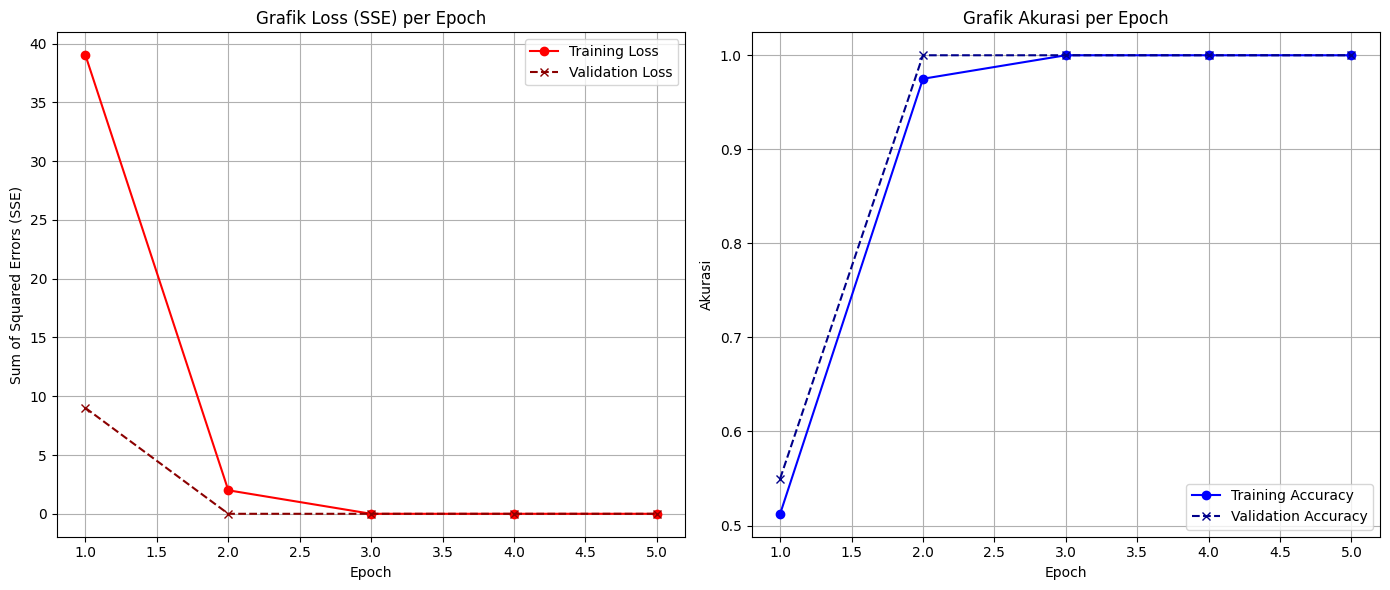

In [31]:
# Tahap Membuat Grafik Performa ---
epochs_range = range(1, n_epochs + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Grafik Loss (SSE)
ax[0].plot(epochs_range, current_sse_history, marker='o', color='r', label='Training Loss')
ax[0].plot(epochs_range, val_sse_history, marker='x', linestyle='--', color='darkred', label='Validation Loss')
ax[0].set_title('Grafik Loss (SSE) per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum of Squared Errors (SSE)')
ax[0].legend()
ax[0].grid(True)

# Plot 2: Grafik Akurasi
ax[1].plot(epochs_range, current_accuracy_history, marker='o', color='b', label='Training Accuracy')
ax[1].plot(epochs_range, val_accuracy_history, marker='x', linestyle='--', color='darkblue', label='Validation Accuracy')
ax[1].set_title('Grafik Akurasi per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Akurasi')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()